**Question 9 -**

Write a program to read the data from the following link, perform data analysis and answer the following
questions

**Note -**

**1.** Write code comments wherever required for code understanding

**Link -** https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD

**Insights to be drawn -**

● Get all the cars and their types that do not qualify for clean alternative fuel vehicle

● Get all TESLA cars with the model year, and model type made in Bothell City.

● Get all the cars that have an electric range of more than 100, and were made after
2015

● Draw plots to show the distribution between city and electric vehicle type

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("ev.csv")
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10
1,1N4BZ1DV4N,Island,Clinton,WA,98236.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,10.0,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,5.302997e+10
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EBXL,King,Seattle,WA,98134.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.0,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1CP0D,Snohomish,Edmonds,WA,98020.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10


In [3]:
data.shape

(135038, 17)

In [4]:
#Checking for null values

data.isnull().sum()

VIN (1-10)                                             0
County                                                 8
City                                                   8
State                                                  0
Postal Code                                            8
Model Year                                             0
Make                                                   0
Model                                                249
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         1
Base MSRP                                              1
Legislative District                                 312
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       8
2020 Census Tract                                      8
dtype: int64

In [5]:
# Handling null values

data.dropna(axis=0, inplace= True)

In [6]:
data.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [7]:
data.shape

(134474, 17)

**Get all the cars and their types that do not qualify for clean alternative fuel vehicle**

In [8]:
# finding out unique values of clean alternative fuel vehicle (CAFV) Eligibility column

data["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Eligibility unknown as battery range has not been researched',
       'Not eligible due to low battery range'], dtype=object)

In [9]:
# Categorizing the values of clean alternative fuel vehicle (CAFV) Column into Eligible, Not Eligible, Unknown

replacement = {'Clean Alternative Fuel Vehicle Eligible':"Eligible",
               'Not eligible due to low battery range' : "Not Eligible",
            'Eligibility unknown as battery range has not been researched' : 'Unknown'
              }

data["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] = data["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].replace(replacement)

In [10]:
#Filtering data based on the cars and their types that do not qualify for clean alternative fuel vehicle

filtered_data = data[data["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] == 'Not Eligible'][['Make', 'Model', 'Electric Vehicle Type']]

filtered_data

,Make,Model,Electric Vehicle Type
7,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV)
8,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV)
12,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV)
20,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV)
21,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV)
...,...,...,...
135022,MITSUBISHI,OUTLANDER,Plug-in Hybrid Electric Vehicle (PHEV)
135024,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV)
135027,MITSUBISHI,OUTLANDER,Plug-in Hybrid Electric Vehicle (PHEV)
135030,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV)


In [11]:
filtered_data[filtered_data["Electric Vehicle Type"]== "Battery Electric Vehicle (BEV)"].count()

Make                     10
Model                    10
Electric Vehicle Type    10
dtype: int64

In [12]:
filtered_data[filtered_data["Electric Vehicle Type"]== "Plug-in Hybrid Electric Vehicle (PHEV)"].count()

Make                     16764
Model                    16764
Electric Vehicle Type    16764
dtype: int64

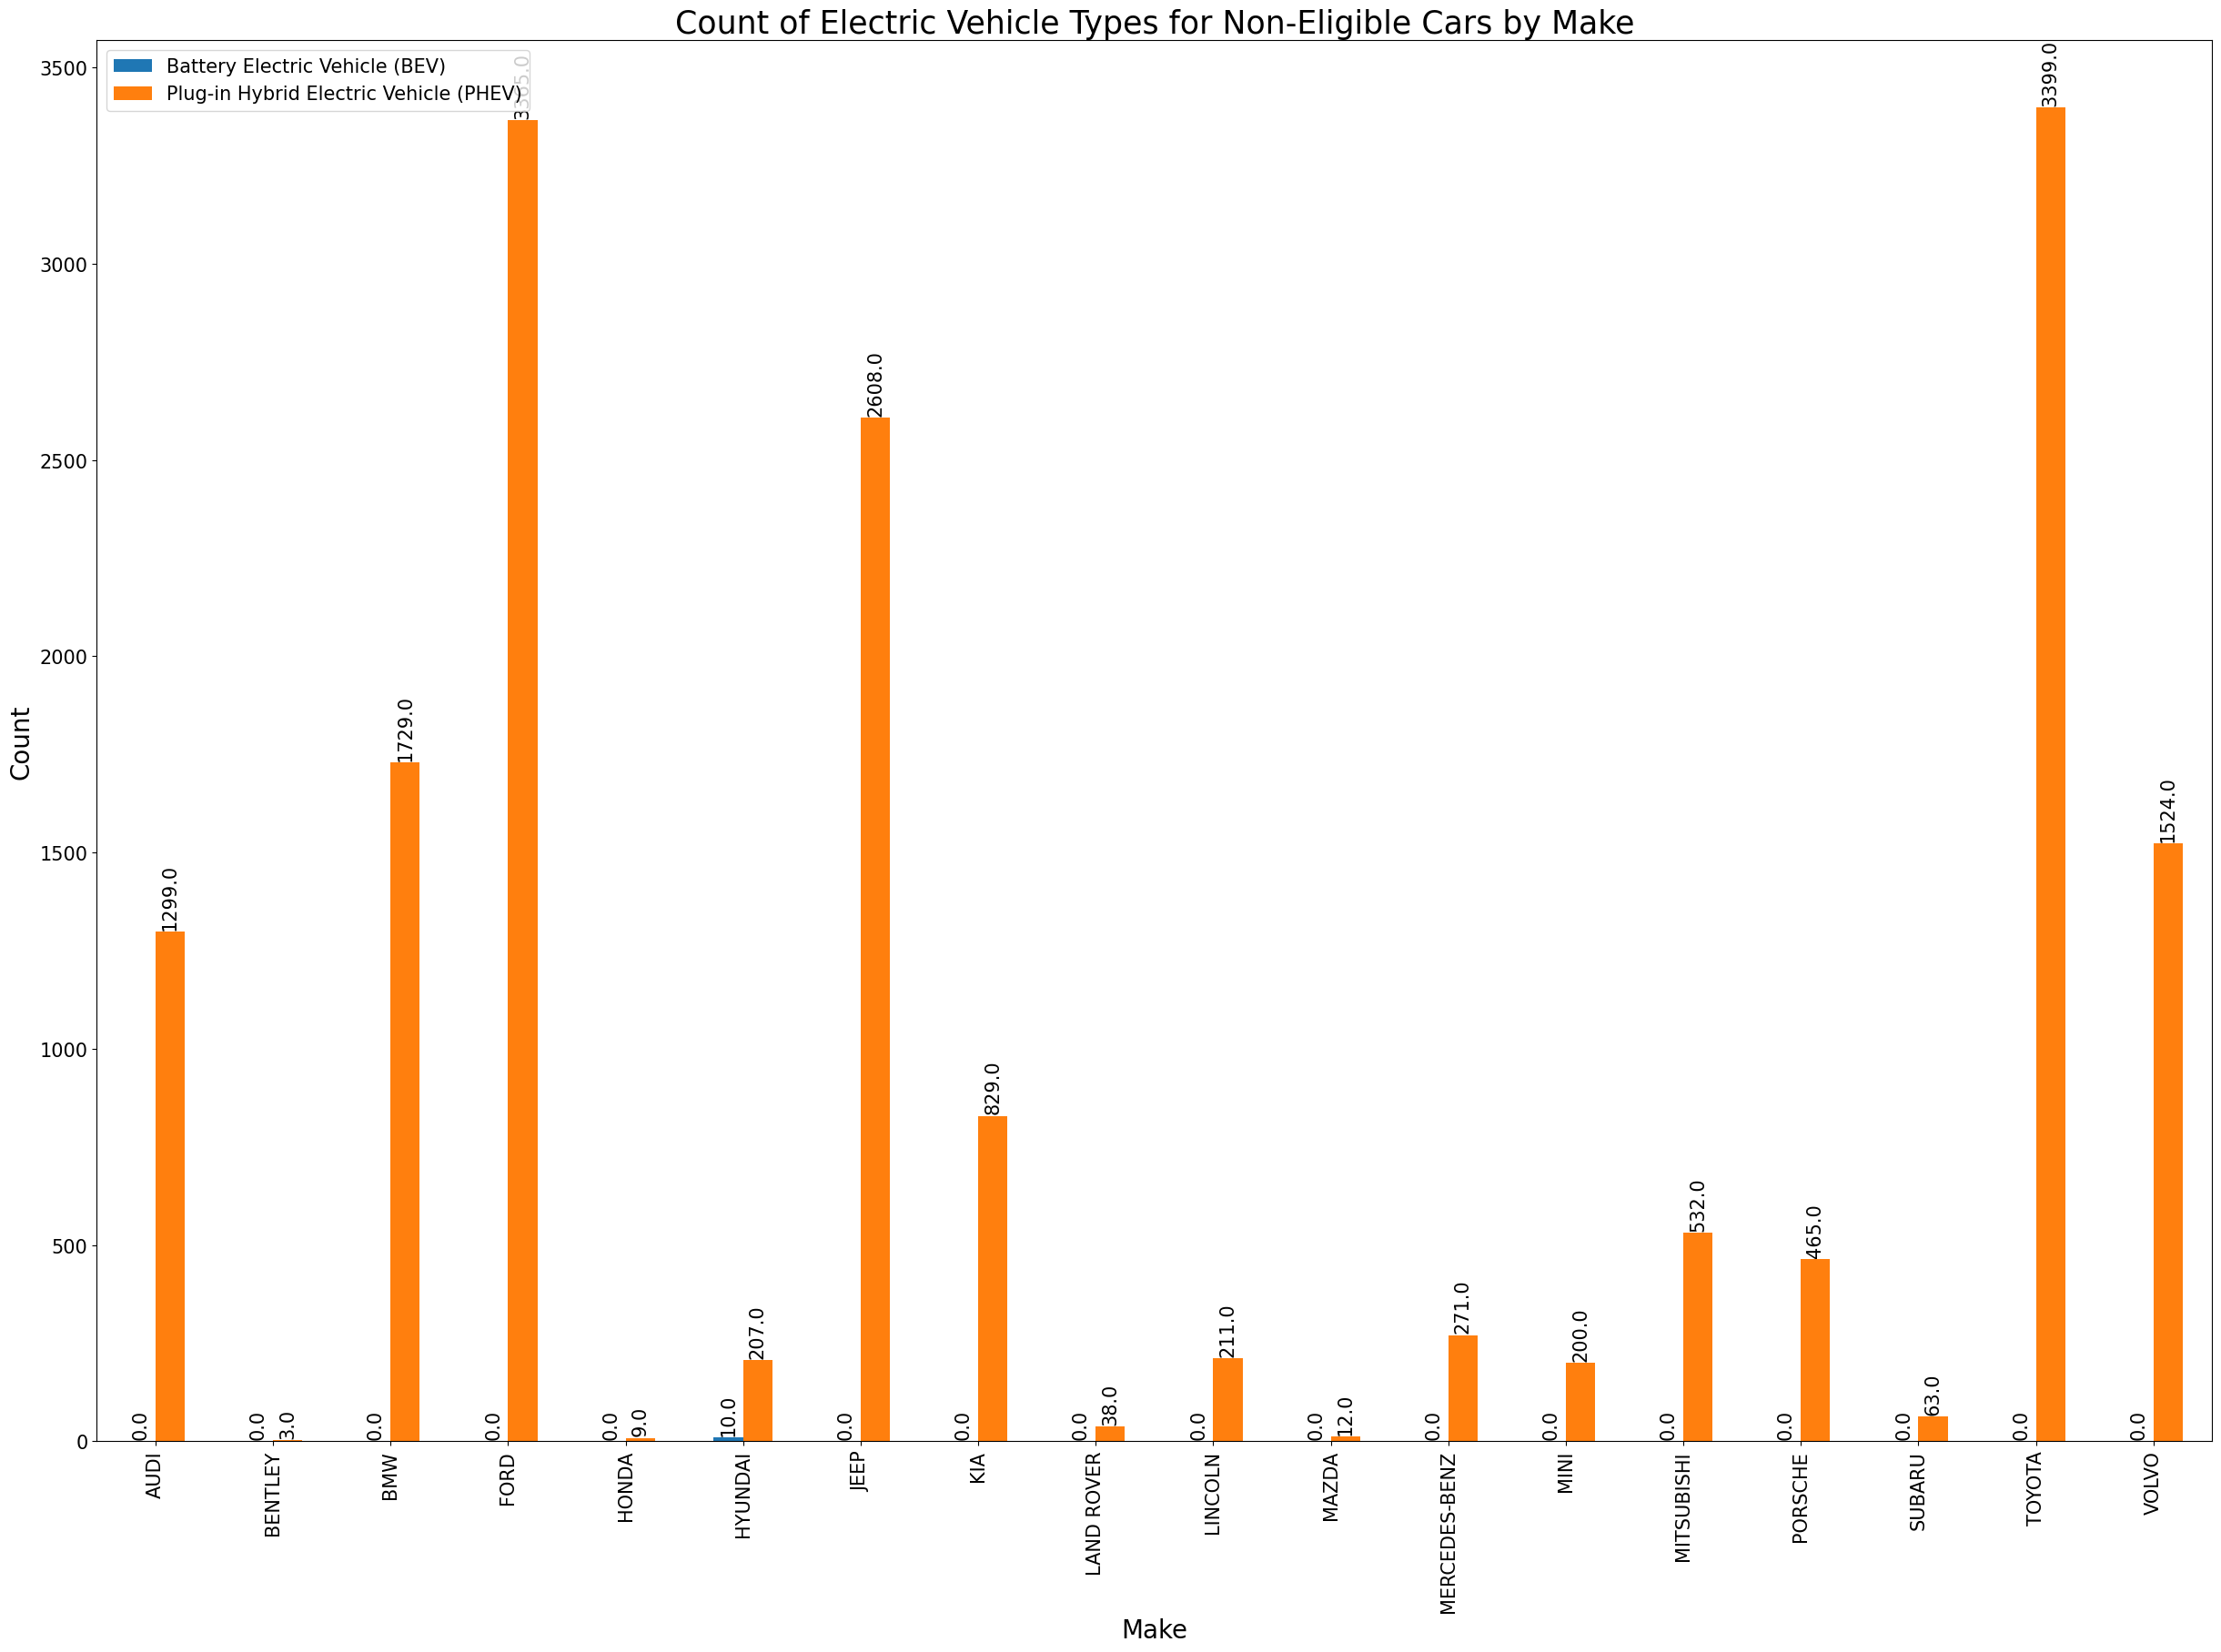

In [13]:
filtered_data = data[data["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] == 'Not Eligible'][['Make', 'Model', 'Electric Vehicle Type']]

counts = filtered_data.groupby(['Make', 'Electric Vehicle Type']).size().unstack()

# Create the figure and axes

fig, ax = plt.subplots(figsize=(30, 20))  

# Use the axes to plot the data

counts.plot(kind='bar', stacked=False, ax=ax)  

plt.xlabel('Make',fontsize=20)

plt.ylabel('Count',fontsize=20)

plt.title('Count of Electric Vehicle Types for Non-Eligible Cars by Make',fontsize=25)

plt.xticks(rotation=90,fontsize=15)

plt.yticks(rotation=0,fontsize=15)

plt.legend(loc='upper left',fontsize=15)

# Add data labels

for container in ax.containers:
    
    for rect in container:
        
        height = rect.get_height()
        
        x = rect.get_x() + rect.get_width() / 2
        
        y = height + 5  # Adjust the offset for label positioning
        
        ax.text(x, y, height, ha='center', va='bottom', rotation=90, fontsize=15)

plt.show()

**Insight:**

- **Toyota** is having the **most number of Plugin Hybrid Electric Vehicle(3382)** that are **not eligible** for Clean Alternative Fuel     Vehicle(CAFV).
- **Hyundai** is having the **most number of Battery Electric Vehicle (9)** that are **not eligible** for Clean Alternative Fuel Vehicle(CAFV).

● **Get all TESLA** cars with the model year, and model type **made in Bothell City**.

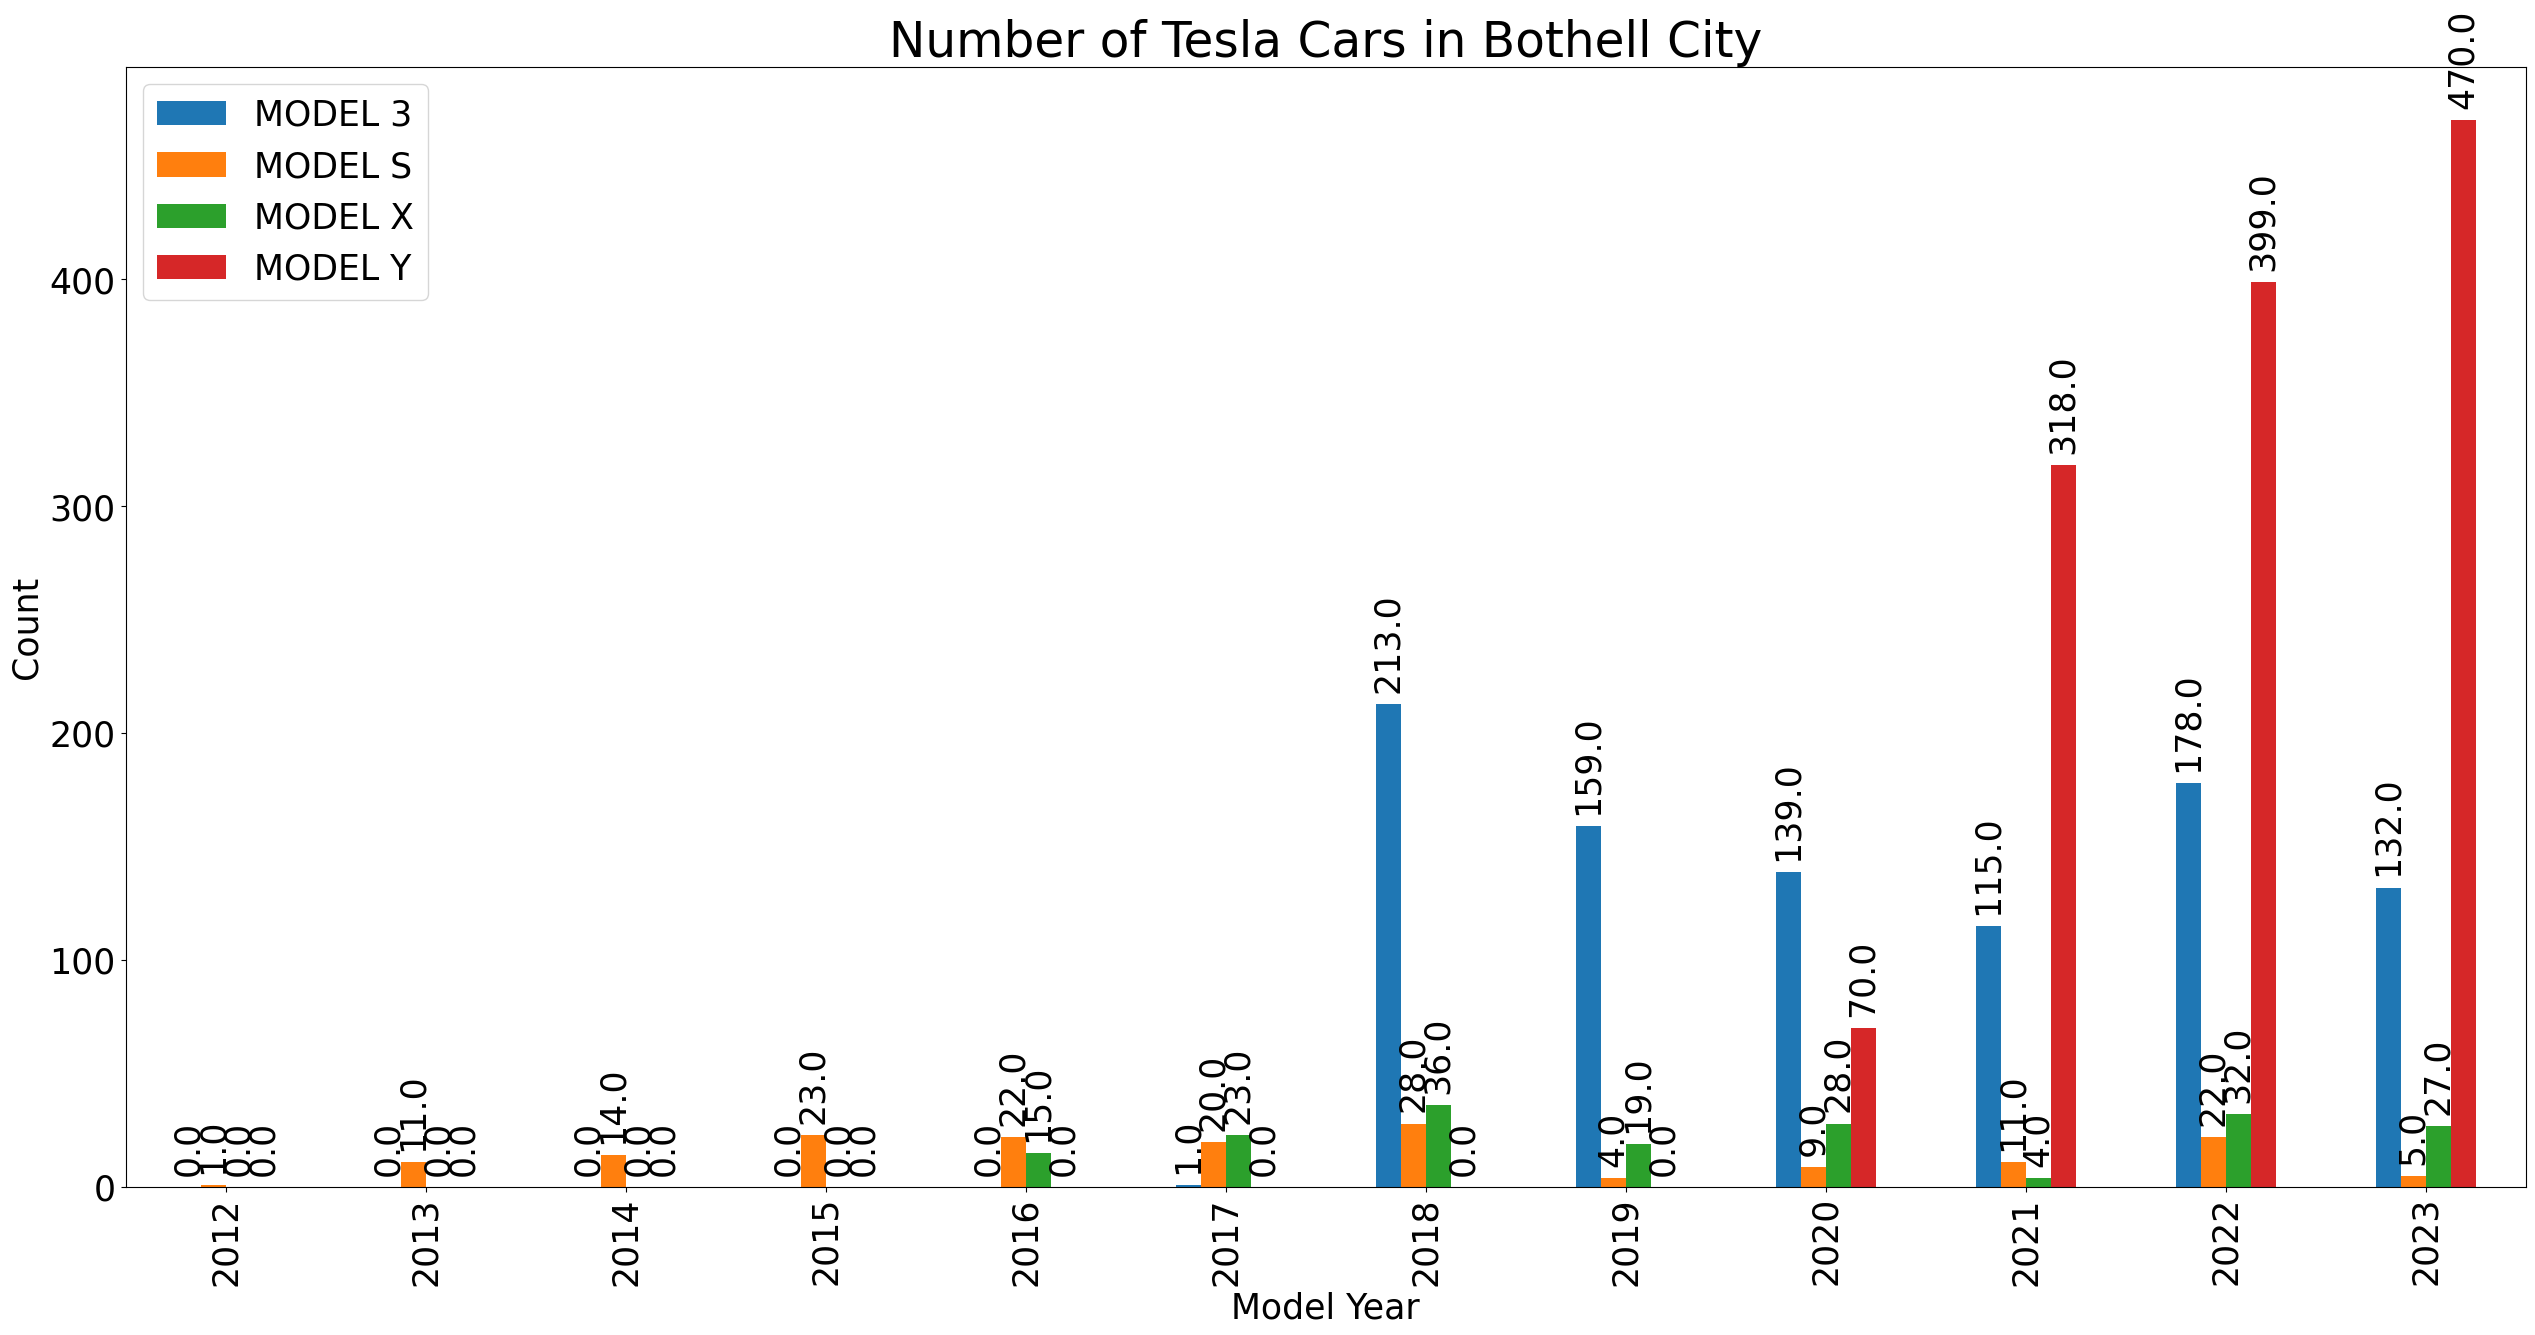

In [14]:
# Filtering Data based on make and city

tesla_cars_bothell = data[(data['Make'] == 'TESLA') & (data['City'] == 'Bothell')]

tesla_cars_bothell_filtered = tesla_cars_bothell[['Model Year', 'Model']]

# Grouping by Model Year and Model and getting the counts

counts = tesla_cars_bothell_filtered.groupby(['Model Year', 'Model']).size().unstack()

# Creating the figure and axes

fig, ax = plt.subplots(figsize=(30, 16))

# Plotting the bar graph

counts.plot(kind='bar', stacked=False, ax=ax)

plt.xlabel('Model Year',fontsize=25)

plt.ylabel('Count',fontsize=25)

plt.title('Number of Tesla Cars in Bothell City',fontsize=35)

plt.xticks(rotation=90,fontsize=25)

plt.yticks(rotation=0,fontsize=25)

plt.legend(loc='upper left',fontsize=25)

# Add data labels

for container in ax.containers:
    
    for rect in container:
        
        height = rect.get_height()
        
        x = rect.get_x() + rect.get_width() / 2
        
        y = height + 5  # Adjust the offset for label positioning
        
        ax.text(x, y, height, ha='center', va='bottom', rotation=90, fontsize=25)

# Adjust the margins

plt.subplots_adjust(bottom=0.2, left=0.1, right=0.9, top=0.9)

plt.show()

**Insight:**

- Most of **Tesla** car models made in **Bothell city** during **2012 to 20223**
- In the year **2022** **maximum** numbers of **Tesla Model Y** cars **(400)** were made.
- In the year **2018** **maximum** number of **Tesla Model X (35)**, **Model S(29)**, **Model 3(214)** were made.

● **Get all the cars** that have an **electric range of more than 100**, and were **made after 2015**

In [15]:
#filtering data based on electric range of cars and model year

electric_cars = data[(data['Electric Range'] > 100) & (data['Model Year'] > 2015)]

electric_cars

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligible,220.0,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligible,266.0,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EBXL,King,Seattle,WA,98134.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligible,322.0,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
6,5YJ3E1EC1L,Snohomish,Marysville,WA,98271.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligible,308.0,0.0,38.0,110992472,POINT (-122.17138469999998 48.10433000000006),PUGET SOUND ENERGY INC,5.306105e+10
9,1N4AZ1CP2J,Thurston,Lacey,WA,98503.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligible,151.0,0.0,22.0,235573929,POINT (-122.82849999999996 47.036460000000034),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135013,1N4BZ0CP0H,King,Sammamish,WA,98074.0,2017,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligible,107.0,0.0,45.0,273504535,POINT (-122.03132659999994 47.62857820000005),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
135015,1N4AZ1CP6K,Chelan,Peshastin,WA,98847.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligible,150.0,0.0,12.0,295483660,POINT (-120.60007999999999 47.56876500000004),PUD NO 1 OF CHELAN COUNTY,5.300796e+10
135016,5YJ3E1EA0L,King,Bellevue,WA,98027.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligible,266.0,0.0,41.0,1847898,POINT (-122.03643999999997 47.53374000000008),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
135032,5YJ3E1EC4L,Snohomish,Edmonds,WA,98020.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligible,308.0,0.0,32.0,3315315,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10


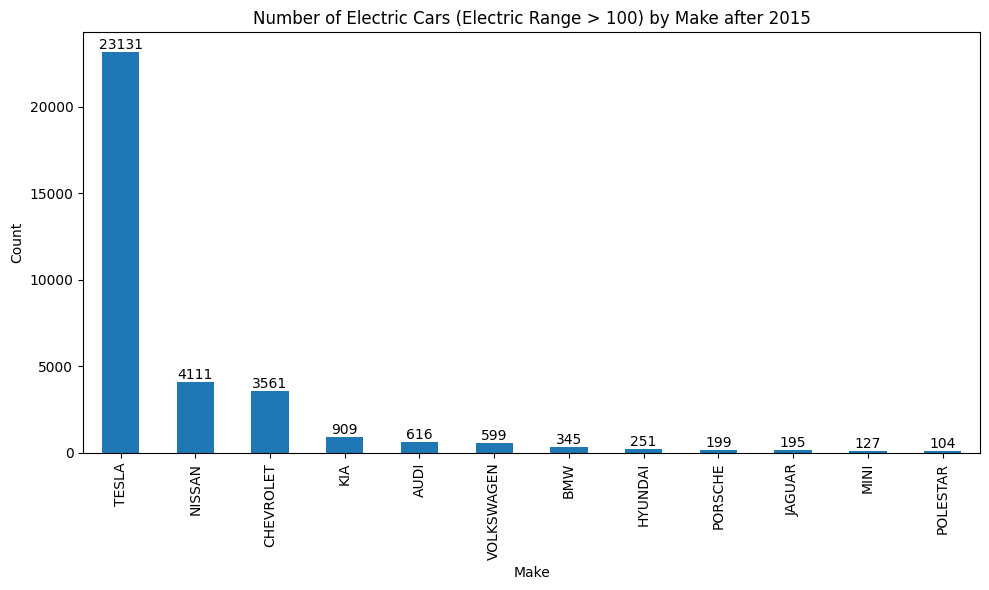

In [16]:
# Plotting the graph

counts = electric_cars['Make'].value_counts()

plt.figure(figsize=(10, 6))

ax = counts.plot(kind='bar')

plt.xlabel('Make')

plt.ylabel('Count')

plt.title('Number of Electric Cars (Electric Range > 100) by Make after 2015')

plt.xticks(rotation=90)

plt.tight_layout()

# Add data labels

for i, v in enumerate(counts):
    
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()

**Insight:**

- From the above graph it is clear that **Tesla has most number of cars made after 2015** that are having **range more than 100** & **Polestar has the least number of cars**.

● Draw **plots** to show the **distribution between city and electric vehicle type**

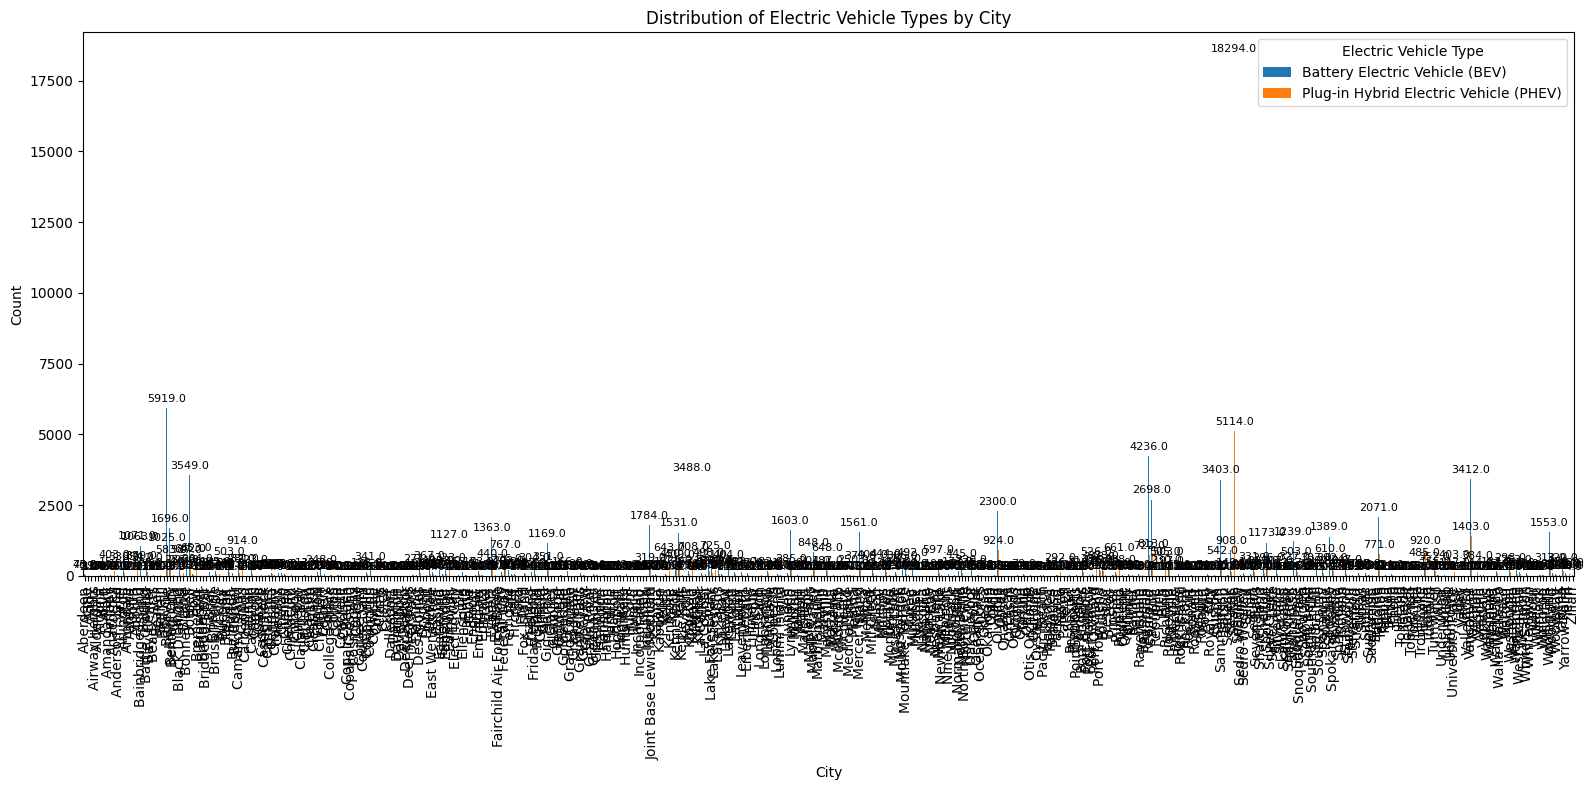

In [17]:
# Group the data by 'City' and 'Electric Vehicle Type' and calculate the counts

city_ev_type_counts = data.groupby(['City', 'Electric Vehicle Type']).size().unstack()

# Bar plot - distribution of electric vehicle types by city

fig, ax = plt.subplots(figsize=(16, 8)) 

city_ev_type_counts.plot(kind='bar', stacked=False, ax=ax)

plt.xlabel('City')

plt.ylabel('Count')

plt.title('Distribution of Electric Vehicle Types by City')

plt.xticks(rotation=90)

plt.legend(title='Electric Vehicle Type')

plt.tight_layout()

# Add data labels

for container in ax.containers:
    
    for rect in container:
        
        height = rect.get_height()
        
        ax.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=8)

plt.show()

In [18]:
# Group the data by 'City' and 'Electric Vehicle Type' and calculate the counts

city_ev_type_counts = data.groupby(['City', 'Electric Vehicle Type']).size().unstack()

# Sum the counts of Battery Electric Vehicle (BEV) for each city

city_bev_counts = city_ev_type_counts['Battery Electric Vehicle (BEV)']

# Sort the cities based on the BEV counts in descending order and select the top 5 cities

top_5_cities = city_bev_counts.sort_values(ascending=False).head(5)

print(top_5_cities)

City
Seattle     18294.0
Bellevue     5919.0
Redmond      4236.0
Bothell      3549.0
Kirkland     3488.0
Name: Battery Electric Vehicle (BEV), dtype: float64


In [19]:
# Group the data by 'City' and 'Electric Vehicle Type' and calculate the counts

city_ev_type_counts = data.groupby(['City', 'Electric Vehicle Type']).size().unstack()

# Sum the counts of Battery Electric Vehicle (BEV) for each city

city_bev_counts = city_ev_type_counts['Plug-in Hybrid Electric Vehicle (PHEV)']

# Sort the cities based on the BEV counts in descending order and select the top 5 cities

top_5_cities = city_bev_counts.sort_values(ascending=False).head(5)

print(top_5_cities)

City
Seattle      5114.0
Vancouver    1403.0
Bellevue     1025.0
Olympia       924.0
Tukwila       920.0
Name: Plug-in Hybrid Electric Vehicle (PHEV), dtype: float64


In [20]:
# Calculate the sum of counts for each city

city_counts = city_ev_type_counts.sum(axis=1)

# Sort the cities in descending order based on the counts

sorted_cities = city_counts.sort_values(ascending=False)

# Select the top 5 cities

top_5_cities = sorted_cities.head(5)

print(top_5_cities)

City
Seattle      23408.0
Bellevue      6944.0
Redmond       4958.0
Vancouver     4815.0
Kirkland      4196.0
dtype: float64


**Insight:**

**Top 5 Cities** with most **electric cars**:

**1.** **Seattle** City has the most number of **electric cars (22819)**. There are **17776 numbers of BEV** & **5043 numbers of PHEV** in Seattle.

**2.** **Bellevue** City has **6732** number of **electric cars** out of which **5713 are BEV** & **1019 are PHEV**.

**3.** **Redmond** has **4814** number of **electric cars** out of which **4106 are BEV** & **708 are PHEV**.

**4.** **Vancouver** has **4648** number of **electric cars** out of which **3283 are BEV** & **1365 are PHEV**.

**5.** **Kirkland** has **4066** number of **electric cars** out of which **3383 are BEV** & **683 are PHEV**.